In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV, ElasticNetCV
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kurtosis


In [2]:
wine = pd.read_csv('Wine_New.csv')
wine.head()

,fixed acidity,volatile acidity,critric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,14.597442,0.27,0.722678,20.7,0.255607,137.728720,53.053366,1.0010,3.128677,0.471783,11.309539,6.0
1,8.288791,0.30,1.749025,1.6,0.128959,86.111551,64.933772,0.9940,3.691148,0.923397,8.126983,5.0
2,3.089898,0.28,0.837108,6.9,0.306241,8.266643,26.102900,0.9951,3.549499,1.016564,11.247490,5.0
3,13.931712,0.23,0.241370,8.5,0.266436,212.246505,16.764493,0.9956,2.867154,0.507882,11.104247,6.0
4,14.271228,0.23,0.717399,8.5,0.320200,109.031626,424.269899,0.9956,2.865725,0.883249,8.062316,6.0


In [3]:
wine_poor =wine[(wine['quality']<6)]
wine_poor.head()


,fixed acidity,volatile acidity,critric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,8.288791,0.30,1.749025,1.6,0.128959,86.111551,64.933772,0.9940,3.691148,0.923397,8.126983,5.0
2,3.089898,0.28,0.837108,6.9,0.306241,8.266643,26.102900,0.9951,3.549499,1.016564,11.247490,5.0
7,4.007259,0.27,0.114301,20.7,0.311429,47.942185,347.504463,1.0010,3.069059,1.001918,11.736427,5.0
8,12.197771,0.30,1.353443,1.6,0.131701,133.452682,344.047374,0.9940,2.962240,0.245577,11.865377,5.0
9,5.841717,0.22,0.192240,1.5,0.257865,182.925867,230.706425,0.9938,3.342903,0.851317,8.137473,5.0


In [4]:
wine_poor.count()

fixed acidity           1018
volatile acidity        1018
critric acid            1018
residual sugar          1018
chlorides               1018
free sulfur dioxide     1018
total sulfur dioxide    1018
density                 1018
pH                      1018
sulphates               1018
alcohol                 1018
quality                 1018
dtype: int64

In [5]:
wine_poor['quality'].describe()

count    1018.000000
mean        4.909627
std         0.303512
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: quality, dtype: float64

In [6]:
density=wine['density']
residual_sugar=wine['residual sugar']
volatile_acidity=wine['volatile acidity']
quality=wine['quality']

In [7]:
wine1=wine[['quality','density','residual sugar','volatile acidity']]
wine1.head()

,quality,density,residual sugar,volatile acidity
0,6.0,1.0010,20.7,0.27
1,5.0,0.9940,1.6,0.30
2,5.0,0.9951,6.9,0.28
3,6.0,0.9956,8.5,0.23
4,6.0,0.9956,8.5,0.23


In [8]:
wine1.corr()

,quality,density,residual sugar,volatile acidity
quality,1.000000,-0.225504,-0.023050,-0.213460
density,-0.225504,1.000000,0.839781,0.062720
residual sugar,-0.023050,0.839781,1.000000,0.092867
volatile acidity,-0.213460,0.062720,0.092867,1.000000


In [9]:
residual_sugar.head()



0    20.7
1     1.6
2     6.9
3     8.5
4     8.5
Name: residual sugar, dtype: float64

In [10]:
volatile_acidity.head()

0    0.27
1    0.30
2    0.28
3    0.23
4    0.23
Name: volatile acidity, dtype: float64

In [11]:
wine.corr()

,fixed acidity,volatile acidity,critric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.000507,-0.005350,-0.000353,0.008160,0.028897,-0.022439,0.001055,-0.002756,-0.008172,0.013041,0.469078
volatile acidity,-0.000507,1.000000,-0.009634,0.092867,0.003054,0.012155,0.022878,0.062720,-0.012604,0.003202,-0.002991,-0.213460
critric acid,-0.005350,-0.009634,1.000000,-0.013108,0.013268,0.018540,-0.003182,-0.016051,0.041180,-0.002692,-0.027137,0.003186
residual sugar,-0.000353,0.092867,-0.013108,1.000000,-0.003475,-0.028105,-0.003072,0.839781,0.009022,0.011107,-0.003176,-0.023050
chlorides,0.008160,0.003054,0.013268,-0.003475,1.000000,0.014025,-0.006618,-0.020391,-0.008223,0.010086,0.014409,-0.053384
free sulfur dioxide,0.028897,0.012155,0.018540,-0.028105,0.014025,1.000000,0.014553,-0.022882,0.015549,-0.011700,-0.015964,0.462151
total sulfur dioxide,-0.022439,0.022878,-0.003182,-0.003072,-0.006618,0.014553,1.000000,-0.004695,-0.005970,0.006921,0.002192,-0.061752
density,0.001055,0.062720,-0.016051,0.839781,-0.020391,-0.022882,-0.004695,1.000000,-0.004419,0.021988,0.002265,-0.225504
pH,-0.002756,-0.012604,0.041180,0.009022,-0.008223,0.015549,-0.005970,-0.004419,1.000000,0.008990,-0.016355,0.355839
sulphates,-0.008172,0.003202,-0.002692,0.011107,0.010086,-0.011700,0.006921,0.021988,0.008990,1.000000,0.002504,0.176389


In [12]:
density.corr(residual_sugar,)

0.8397811198409381

In [13]:
density.corr(volatile_acidity,)

0.06271995565002475

In [14]:
volatile_acidity.corr(residual_sugar)

0.09286723742146968

In [15]:
X = wine.iloc[:, :-1] # x features
y = wine.iloc[:, -1] # y responses value
 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

 

In [17]:
# with intercept
lr_obj = LinearRegression()
lr_obj.fit(X_train, y_train)
preds_ols = lr_obj.predict(X_test)
print("OLS: {0}".format(mean_squared_error(y_test, preds_ols)/2))

OLS: 0.04408878343551022


In [18]:
print(lr_obj.intercept_)
print(lr_obj.coef_)

191.72795102466608
[ 1.06178984e-01 -1.81652548e+00 -1.13278471e-02  9.60281440e-02
 -6.92019660e-01  4.45600635e-03 -3.61260704e-04 -1.93013454e+02
  8.26661990e-01  6.23347316e-01  1.39425673e-01]


In [19]:
#without intercept
lrr_obj = LinearRegression(fit_intercept=False, normalize=False, copy_X=True, n_jobs=None)
lrr_obj.fit(X_train, y_train)
preds_ols = lrr_obj.predict(X_test)
print("OLS: {0}".format(mean_squared_error(y_test, preds_ols)/2))


OLS: 0.0938192131663866


In [20]:
print(lrr_obj.intercept_)
# For other beta
print(lrr_obj.coef_)

0.0
[ 1.07009433e-01 -1.74336964e+00 -3.94527416e-03  1.50591828e-04
 -5.42979277e-01  4.47821549e-03 -3.16203898e-04  2.88867109e-01
  8.63977548e-01  5.92103646e-01  1.37807260e-01]


In [21]:
#q3 

In [22]:
y_train.mean()

6.0071875

In [23]:
y_train.describe()

count    3200.000000
mean        6.007187
std         0.812307
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max         8.000000
Name: quality, dtype: float64

In [24]:
ycenter_train=y_train-y_train.mean()


In [25]:
x_new1=X_train['fixed acidity']-X_train['fixed acidity'].mean()


In [26]:
x_new2=X_train['volatile acidity']-X_train['volatile acidity'].mean()

In [27]:
x_new3=X_train['critric acid']-X_train['critric acid'].mean()

In [28]:
x_new4=X_train['residual sugar']-X_train['residual sugar'].mean()

In [29]:
x_new5=X_train['chlorides']-X_train['chlorides'].mean()

In [30]:
x_new6=X_train['free sulfur dioxide']-X_train['free sulfur dioxide'].mean()

In [31]:
x_new7=X_train['total sulfur dioxide']-X_train['total sulfur dioxide'].mean()

In [32]:
x_new8=X_train['density']-X_train['density'].mean()

In [33]:
x_new9=X_train['pH']-X_train['pH'].mean()

In [34]:
x_new10=X_train['sulphates']-X_train['sulphates'].mean()

In [35]:
x_new11=X_train['alcohol']-X_train['alcohol'].mean()

In [36]:
xcenter_train=pd.DataFrame([x_new1,x_new2,x_new3,x_new4,x_new5,x_new6,x_new7,x_new8,x_new9,x_new10,x_new11]).T


In [37]:
x_testnew1=X_test['fixed acidity']-X_test['fixed acidity'].mean()

In [38]:
x_testnew2=X_test['volatile acidity']-X_test['volatile acidity'].mean()

In [39]:
x_testnew3=X_test['critric acid']-X_test['critric acid'].mean()

In [40]:
x_testnew4=X_test['residual sugar']-X_test['residual sugar'].mean()  

In [41]:
x_testnew5=X_test['chlorides']-X_test['chlorides'].mean()

In [42]:
x_testnew6=X_test['free sulfur dioxide']-X_test['free sulfur dioxide'].mean() 

In [43]:
x_testnew7=X_test['total sulfur dioxide']-X_test['total sulfur dioxide'].mean()

In [44]:
x_testnew8=X_test['density']-X_test['density'].mean()

In [45]:
x_testnew9=X_test['pH']-X_test['pH'].mean()

In [46]:
x_testnew10=X_test['sulphates']-X_test['sulphates'].mean()

In [47]:
x_testnew11=X_test['alcohol']-X_test['alcohol'].mean()

In [48]:
xcenter_test=pd.DataFrame([x_testnew1,x_testnew2,x_testnew3,x_testnew4,x_testnew5,
                          x_testnew6,x_testnew7,x_testnew8,x_testnew9,x_testnew10,x_testnew11]).T

In [49]:
y_testnew=y_test-y_test.mean()


In [50]:
lrr3_obj = LinearRegression()
lrr3_obj.fit(xcenter_train, ycenter_train)
preds_ols = lrr3_obj.predict(xcenter_test)
print("OLS: {0}".format(mean_squared_error(y_testnew, preds_ols)/2))



OLS: 0.04408760013659672


In [51]:
#with intercept
print(lrr3_obj.intercept_)
# For other beta
print(lrr3_obj.coef_)

8.701195627973102e-13
[ 1.06178984e-01 -1.81652548e+00 -1.13278471e-02  9.60281440e-02
 -6.92019660e-01  4.45600635e-03 -3.61260704e-04 -1.93013454e+02
  8.26661990e-01  6.23347316e-01  1.39425673e-01]


In [52]:
# #without intercept(没用)
# lrr32_obj = LinearRegression(fit_intercept=False, normalize=False, copy_X=True, n_jobs=None)
# lrr32_obj.fit(xcenter_train, ycenter_train)
# preds_ols = lrr32_obj.predict(xcenter_test)
# print("OLS: {0}".format(mean_squared_error(y_testnew, preds_ols)/2))



In [53]:
#with intercept
# print(lrr32_obj.intercept_)
# # For other beta
# print(lrr32_obj.coef_)

In [54]:
#Q4(1)

In [55]:
wine_poor =wine[(wine['quality']<6)].sample(n=200, random_state=0)
wine_poor.head()



,fixed acidity,volatile acidity,critric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1683,3.126106,0.25,0.467807,14.4,0.100180,47.163696,56.945707,0.99860,3.068051,1.021860,13.246068,5.0
2170,3.894873,0.19,0.412399,12.8,0.077457,29.217110,278.019507,0.99860,3.449873,0.615338,13.203304,5.0
875,3.379725,0.21,1.504676,2.2,0.330457,8.185828,219.387711,0.99300,3.788070,0.936848,8.310725,5.0
2643,3.103476,0.33,0.034377,5.2,0.241864,30.300393,328.126821,0.99527,2.982601,0.439957,13.577000,4.0
68,12.808128,0.23,0.706059,2.1,0.291294,43.704137,93.034501,0.99260,2.848031,0.259820,11.667792,5.0


In [56]:
wine_good=wine[(wine['quality']>=6)].sample(n=200,random_state=0)
wine_good.head()


,fixed acidity,volatile acidity,critric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
440,12.596189,0.22,1.649097,1.6,0.280095,97.216994,225.231025,0.99130,3.601343,0.449338,14.018333,7.0
3252,10.738063,0.26,0.533391,5.5,0.154494,83.497748,92.159496,0.99082,2.962823,0.674119,10.051296,6.0
3488,13.355930,0.20,0.351990,1.4,0.004891,127.989063,355.969589,0.99088,3.564018,0.594325,10.393825,7.0
1246,13.128423,0.20,1.523367,5.2,0.035838,150.559414,260.664700,0.99530,3.398588,0.558451,9.576683,6.0
1802,8.352261,0.23,0.434546,15.4,0.047682,42.040804,68.106984,0.99840,3.580832,0.794874,12.416746,6.0


In [57]:
wine_new=pd.concat([wine_good, wine_poor])
wine_new.head()

,fixed acidity,volatile acidity,critric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
440,12.596189,0.22,1.649097,1.6,0.280095,97.216994,225.231025,0.99130,3.601343,0.449338,14.018333,7.0
3252,10.738063,0.26,0.533391,5.5,0.154494,83.497748,92.159496,0.99082,2.962823,0.674119,10.051296,6.0
3488,13.355930,0.20,0.351990,1.4,0.004891,127.989063,355.969589,0.99088,3.564018,0.594325,10.393825,7.0
1246,13.128423,0.20,1.523367,5.2,0.035838,150.559414,260.664700,0.99530,3.398588,0.558451,9.576683,6.0
1802,8.352261,0.23,0.434546,15.4,0.047682,42.040804,68.106984,0.99840,3.580832,0.794874,12.416746,6.0


In [58]:
#Q4(2)

In [59]:
x = wine_new.iloc[:, :-1] # x features
y = wine_new.iloc[:, -1] 
X_latrain, X_latest, y_latrain, y_latest = train_test_split(x,y,test_size=0.2, random_state=0,)


In [60]:
x_nnew1=X_latrain['fixed acidity']-X_latrain['fixed acidity'].mean();
x_nnew2=X_latrain['volatile acidity']-X_latrain['volatile acidity'].mean();
x_nnew3=X_latrain['critric acid']-X_latrain['critric acid'].mean();
x_nnew4=X_latrain['residual sugar']-X_latrain['residual sugar'].mean();
x_nnew5=X_latrain['chlorides']-X_latrain['chlorides'].mean();
x_nnew6=X_latrain['free sulfur dioxide']-X_latrain['free sulfur dioxide'].mean();
x_nnew7=X_latrain['total sulfur dioxide']-X_latrain['total sulfur dioxide'].mean();
x_nnew8=X_latrain['density']-X_latrain['density'].mean();
x_nnew9=X_latrain['pH']-X_latrain['pH'].mean();
x_nnew10=X_latrain['sulphates']-X_latrain['sulphates'].mean();
x_nnew11=X_latrain['alcohol']-X_latrain['alcohol'].mean();
X_latrain=pd.DataFrame([x_nnew1,x_nnew2,x_nnew3,x_nnew4,x_nnew5,x_nnew6,x_nnew7,x_nnew8,x_nnew9,x_nnew10,x_nnew11]).T

In [61]:
x_testnnew1=X_latest['fixed acidity']-X_test['fixed acidity'].mean();
x_testnnew2=X_latest['volatile acidity']-X_test['volatile acidity'].mean();
x_testnnew3=X_latest['critric acid']-X_test['critric acid'].mean();
x_testnnew4=X_latest['residual sugar']-X_test['residual sugar'].mean();  
x_testnnew5=X_latest['chlorides']-X_test['chlorides'].mean();
x_testnnew6=X_latest['free sulfur dioxide']-X_test['free sulfur dioxide'].mean();
x_testnnew7=X_latest['total sulfur dioxide']-X_test['total sulfur dioxide'].mean();
x_testnnew8=X_latest['density']-X_test['density'].mean();
x_testnnew9=X_latest['pH']-X_test['pH'].mean();
x_testnnew10=X_latest['sulphates']-X_test['sulphates'].mean();
x_testnnew11=X_latest['alcohol']-X_test['alcohol'].mean();
X_latest=pd.DataFrame([x_testnnew1,x_testnnew2,x_testnnew3,x_testnnew4,x_testnnew5,
                          x_testnnew6,x_testnnew7,x_testnnew8,x_testnnew9,x_testnnew10,x_testnnew11]).T

In [62]:
y_latrain=y_latrain-y_latrain.mean()

In [63]:
y_latest=y_latest-y_latest.mean()

In [64]:
#alpha lamda /2n

In [65]:
alpha_range=10.**np.arange(-2,3)
lascv = LassoCV(normalize=True,alphas=alpha_range)
lascv.fit(X_latrain, y_latrain)
preds_lassocv = lascv.predict(X_latest)
print("LASSO: {0}".format(mean_squared_error(y_latest, preds_lassocv)/2))
print("LASSO Lambda: {0}".format(lascv.alpha_))

LASSO: 0.19752397827799578
LASSO Lambda: 0.01


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [66]:
lascv = LassoCV()
lascv.fit(X_latrain, y_latrain)
preds_lassocv = lascv.predict(X_latest)
print("LASSO: {0}".format(mean_squared_error(y_latest, preds_lassocv)/2))
print("LASSO Lambda: {0}".format(lascv.alpha_))

LASSO: 0.14554109225552975
LASSO Lambda: 0.03781501842857406


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [67]:
#taskB Q1

In [68]:
loans = pd.read_excel('Loans_Data_New.xlsx')
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,title,addr_state,dti,earliest_cr_line,inq_last_6mths,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,debt_settlement_flag
0,12000,12000,12000.00000,36 months,0.1242,400.99,B,B4,5 years,RENT,...,payoff,NJ,22.49,2003-09-01,0,14435.349990,14435.35,12000.00,2435.35,N
1,8000,8000,8000.00000,60 months,0.1521,191.21,D,D2,5 years,RENT,...,Ratha's loan,PA,21.43,1998-12-01,0,9061.140000,9061.14,5704.48,3356.66,Y
2,7000,7000,7000.00000,36 months,0.1065,228.02,B,B2,< 1 year,RENT,...,Loan 12142011,CA,7.38,2004-04-01,0,8208.410003,8208.41,7000.00,1208.41,N
3,21600,21600,20498.26578,60 months,0.1942,565.32,E,E3,8 years,MORTGAGE,...,5 Years to Financial Freedom,GA,16.74,1990-12-01,0,27586.781410,24859.66,21600.00,5986.78,N
4,33425,20675,19010.82122,60 months,0.1349,475.63,C,C1,2 years,MORTGAGE,...,Debt Consolidation Loan,NY,25.71,1978-07-01,3,19893.950000,16765.31,13371.26,6512.03,Y


In [69]:
LCD=pd.read_excel('LCDataDictionary.xlsx')
LCD.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [70]:
loans.isnull().sum()

loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length              14
home_ownership           0
annual_inc               0
verification_status      0
loan_status              0
pymnt_plan               0
purpose                  0
title                    0
addr_state               0
dti                      0
earliest_cr_line         0
inq_last_6mths           0
total_pymnt              0
total_pymnt_inv          0
total_rec_prncp          0
total_rec_int            0
debt_settlement_flag     0
dtype: int64

In [71]:
dummies_loans = pd.get_dummies(loans,drop_first = True)
dummies_loans.head()




,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,earliest_cr_line,inq_last_6mths,total_pymnt,...,addr_state_SD,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,debt_settlement_flag_Y
0,12000,12000,12000.00000,0.1242,400.99,50700.0,22.49,2003-09-01,0,14435.349990,...,0,0,0,0,0,0,0,0,0,0
1,8000,8000,8000.00000,0.1521,191.21,29000.0,21.43,1998-12-01,0,9061.140000,...,0,0,0,0,0,0,0,0,0,1
2,7000,7000,7000.00000,0.1065,228.02,40000.0,7.38,2004-04-01,0,8208.410003,...,0,0,0,0,0,0,0,0,0,0
3,21600,21600,20498.26578,0.1942,565.32,60000.0,16.74,1990-12-01,0,27586.781410,...,0,0,0,0,0,0,0,0,0,0
4,33425,20675,19010.82122,0.1349,475.63,75000.0,25.71,1978-07-01,3,19893.950000,...,0,0,0,0,0,0,0,0,0,1


In [72]:
dummies_loans.describe()



,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,total_pymnt,total_pymnt_inv,...,addr_state_SD,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,debt_settlement_flag_Y
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,...,565.00000,565.000000,565.00000,565.000000,565.00000,565.000000,565.000000,565.000000,565.00000,565.000000
mean,13039.469027,12623.362832,12263.498532,0.132404,372.314867,63990.414425,14.521009,0.991150,13233.126934,12839.506124,...,0.00177,0.072566,0.00177,0.035398,0.00177,0.024779,0.014159,0.007080,0.00177,0.283186
std,7846.395883,7335.373208,7164.897656,0.039057,208.949707,37034.292456,6.408200,1.341479,8743.003971,8539.098131,...,0.04207,0.259653,0.04207,0.184948,0.04207,0.155588,0.118252,0.083917,0.04207,0.450945
min,1000.000000,1000.000000,0.000000,0.057900,35.310000,12000.000000,0.370000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7200.000000,7200.000000,7000.000000,0.106500,215.690000,40000.000000,9.860000,0.000000,6858.700001,6461.140000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,11100.000000,11000.000000,10500.000000,0.126900,337.750000,55000.000000,14.650000,1.000000,11264.480000,11123.650000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,18000.000000,17000.000000,16060.110690,0.162900,474.190000,78000.000000,19.740000,2.000000,17402.239990,16917.780000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.000000
max,35000.000000,35000.000000,35000.000000,0.239100,1269.730000,290000.000000,29.850000,14.000000,48587.490000,48587.490000,...,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


In [75]:
corr = dummies_loans.corr()


In [76]:
corr_postive = corr['debt_settlement_flag_Y'].sort_values(ascending=False)
corr_postive.head()

debt_settlement_flag_Y    1.000000
term_ 60 months           0.323152
total_rec_int             0.245000
int_rate                  0.229406
funded_amnt               0.221004
Name: debt_settlement_flag_Y, dtype: float64

In [77]:
corr_negative = corr['debt_settlement_flag_Y'].sort_values(ascending=True)
corr_negative.head()


loan_status_Fully Paid   -0.753027
grade_B                  -0.191640
total_rec_prncp          -0.172162
sub_grade_B1             -0.137013
purpose_credit_card      -0.137011
Name: debt_settlement_flag_Y, dtype: float64

In [78]:
dummies_loans.kurtosis()


loan_amnt                   0.362230
funded_amnt                 0.467490
funded_amnt_inv             0.619029
int_rate                   -0.569589
installment                 1.252632
annual_inc                  8.016694
dti                        -0.769692
inq_last_6mths             25.537629
total_pymnt                 1.022997
total_pymnt_inv             1.193511
total_rec_prncp             1.169467
total_rec_int               4.449549
term_ 60 months            -1.498636
grade_B                    -1.486422
grade_C                     0.063277
grade_D                     2.007753
grade_E                     7.186047
grade_F                    16.939140
grade_G                    89.982334
sub_grade_A2               30.622570
sub_grade_A3               35.708373
sub_grade_A4               14.677028
sub_grade_A5               19.792979
sub_grade_B1               12.840237
sub_grade_B2               16.939140
sub_grade_B3                8.006643
sub_grade_B4                8.006643
s

In [79]:
dummies_loans.skew()

loan_amnt                  0.933416
funded_amnt                0.910508
funded_amnt_inv            0.910940
int_rate                   0.113222
installment                1.015040
annual_inc                 2.273726
dti                       -0.050117
inq_last_6mths             3.629295
total_pymnt                1.075425
total_pymnt_inv            1.090009
total_rec_prncp            1.033313
total_rec_int              1.995897
term_ 60 months            0.711816
grade_B                    0.720314
grade_C                    1.436338
grade_D                    2.000164
grade_E                    3.026652
grade_F                    4.345019
grade_G                    9.574123
sub_grade_A2               5.702121
sub_grade_A3               6.130415
sub_grade_A4               4.077387
sub_grade_A5               4.660786
sub_grade_B1               3.846401
sub_grade_B2               4.345019
sub_grade_B3               3.158847
sub_grade_B4               3.158847
sub_grade_B5               3

Text(0, 0.5, 'debt_settlement_flag_Y')

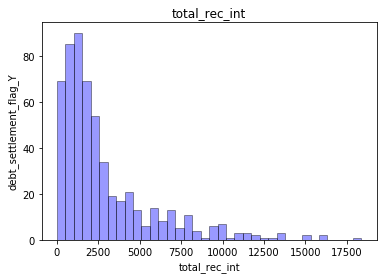

In [80]:
sns.distplot(dummies_loans['total_rec_int'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('total_rec_int')
plt.xlabel('total_rec_int')
plt.ylabel('debt_settlement_flag_Y')

In [ ]:
#q4(2)

In [81]:
def sigmoid(x):
    return 1/(1+exp(-x))

def myLogisticGD(x, y, beta,alpha,numIterations):
    
    x_add_one=np.column_stack((x,np.ones(len(x))))
    xTrans = x_add_one.transpose()
    for i in range(0, numIterations):
        model_0 = np.dot(x_add_one, beta)
        loss_temp = model_0 - y
        loss = -1/len(x)*np.sum((y*np.log(model_0)+(1-y)*np.log(1-model_0)))
        loss_total[i]= loss
        gradient = np.dot(xTrans, loss_temp) /len(x)
        beta = beta - alpha * gradient
        beta_total[i,:]=beta.transpose()
    return beta
    
    
X_loans = loans[['annual_inc','int_rate']]
y_loans = pd.get_dummies(loans['debt_settlement_flag'],drop_first=True).iloc[:,0]
numIterations = 5000
init_beta = [1,1,1]
alpha = 0.001

loss_total= np.zeros((numIterations,1))
beta_total= np.zeros((numIterations,3))

myLogisticGD(X_loans,y_loans,init_beta,alpha,numIterations)



/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


NameError: name 'loss_total' is not defined

In [ ]:
fig1 = plt.figure()
plt.plot(loss_total, label = "Loss fucntion")
plt.plot(beta_total[:,0], label = "Beta0")
plt.plot(beta_total[:,1], label = "Beta1")
plt.legend(loc="upper right")
plt.xlabel("Number of iteration")


In [ ]:
#q3
